In [1]:
import pandas as pd

In [2]:
df_interwencje = pd.read_csv('fatal-police-shootings-data.csv')
df_interwencje

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [3]:
pivot_df = df_interwencje.pivot_table(
    values='id',
    index='race',
    columns='signs_of_mental_illness',
    aggfunc='count',
    fill_value=0
)

In [4]:
pivot_df['Łącznie'] = pivot_df.sum(axis=1)
pivot_df

signs_of_mental_illness,False,True,Łącznie
race,,,
A,69,24,93
B,1114,184,1298
H,745,157,902
N,64,14,78
O,37,11,48
W,1763,713,2476


In [5]:
if True in pivot_df.columns:
    pivot_df['Odsetek z oznakami choroby psychicznej'] = (pivot_df[True] / pivot_df['Łącznie']) * 100
else:
    pivot_df['Odsetek z oznakami choroby psychicznej'] = 0

pivot_df

signs_of_mental_illness,False,True,Łącznie,Odsetek z oznakami choroby psychicznej
race,,,,
A,69,24,93,25.806452
B,1114,184,1298,14.175655
H,745,157,902,17.405765
N,64,14,78,17.948718
O,37,11,48,22.916667
W,1763,713,2476,28.796446


In [6]:
rasa_max_odsetek = pivot_df['Odsetek z oznakami choroby psychicznej'].idxmax()
odsetek_max = pivot_df['Odsetek z oznakami choroby psychicznej'].max()

In [7]:
print(f"Rasa z największym odsetkiem oznak choroby psychicznej: {rasa_max_odsetek} ({odsetek_max:.2f}%)")

Rasa z największym odsetkiem oznak choroby psychicznej: W (28.80%)


In [8]:
df_interwencje['date'] = pd.to_datetime(df_interwencje['date'])
df_interwencje['dzień_tygodnia'] = df_interwencje['date'].dt.day_name()

In [9]:
df_interwencje

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,dzień_tygodnia
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [10]:
interwencje_dni = df_interwencje['dzień_tygodnia'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
interwencje_dni

dzień_tygodnia
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

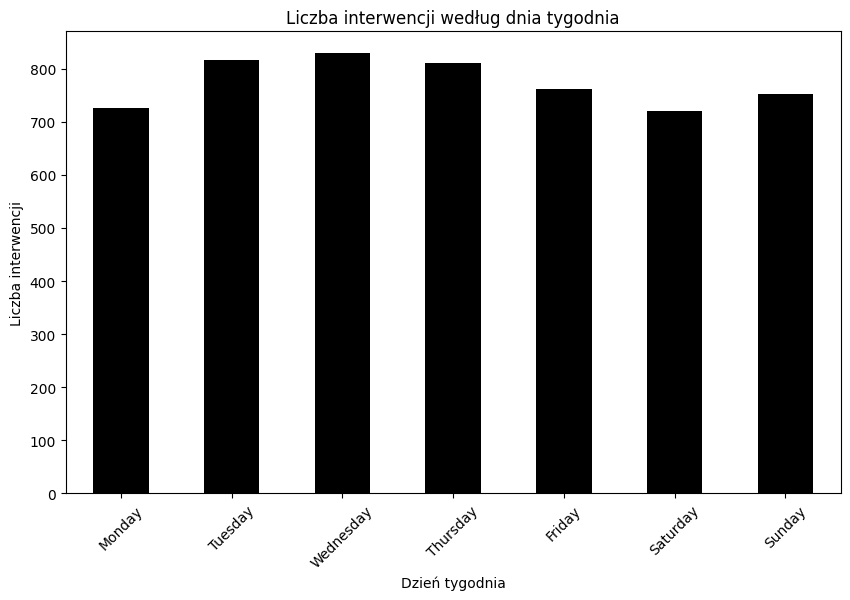

In [13]:
plt.figure(figsize=(10, 6))
interwencje_dni.plot(kind='bar', color='black')
plt.title('Liczba interwencji według dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba interwencji')
plt.xticks(rotation=45)
plt.show()

In [14]:
url_populacja = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'

In [15]:
df_populacja = pd.read_html(url_populacja, header=0)[0]
df_populacja

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [16]:
url_skroty = 'https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations'

In [17]:
df_skroty = pd.read_html(url_skroty, header=0)[1]
df_skroty

,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,Name,Status of region,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[2]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN
...,...,...,...,...,...,...,...,...,...,...
74,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
75,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
76,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
77,Philippine Islands,Obsolete postal code,PH PHL 608[11],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [18]:
df_populacja.rename(columns={
    'State': 'Stan',
    'Census population, April 1, 2020 [1][2]': 'Populacja'
}, inplace=True)

In [19]:
df_populacja

,"Rank in states & territories, 2020","Rank in states & territories, 2010",Stan,Populacja,"Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [20]:
df_skroty = df_skroty[['Name', 'USPS']].rename(columns={'Name': 'Stan', 'USPS': 'Skrót'})

In [21]:
df_skroty

,Stan,Skrót
0,Name,NaN
1,United States of America,NaN
2,Alabama,AL
3,Alaska,AK
4,Arizona,AZ
...,...,...
74,Nebraska,NB
75,Northern Mariana Islands,CM
76,Panama Canal Zone,CZ
77,Philippine Islands,PI


In [22]:
df_populacja['Stan'] = df_populacja['Stan'].str.strip()
df_skroty['Stan'] = df_skroty['Stan'].str.strip()
merged_data = pd.merge(df_populacja, df_skroty, on='Stan', how='inner')

In [23]:
merged_data = pd.merge(df_populacja, df_skroty, left_on='Stan', right_on='Stan', how='inner')

In [24]:
final_data = pd.merge(df_interwencje, merged_data, left_on='state', right_on='Skrót', how='left')

In [25]:
incydenty_na_stan = final_data.groupby('Stan')['id'].count().reset_index()
incydenty_na_stan = pd.merge(incydenty_na_stan, merged_data[['Stan', 'Populacja']], on='Stan')
incydenty_na_stan['Incydenty na 1000 osób'] = (incydenty_na_stan['id'] / incydenty_na_stan['Populacja']) * 1000

In [26]:
print(incydenty_na_stan[['Stan', 'id', 'Populacja', 'Incydenty na 1000 osób']])

                    Stan   id  Populacja  Incydenty na 1000 osób
0                Alabama  104    5024279                0.020699
1                 Alaska   39     733391                0.053178
2                Arizona  254    7151502                0.035517
3               Arkansas   83    3011524                0.027561
4             California  799   39538223                0.020208
5               Colorado  195    5773714                0.033774
6            Connecticut   21    3605944                0.005824
7               Delaware   13     989948                0.013132
8   District of Columbia   13     689545                0.018853
9                Florida  350   21538187                0.016250
10               Georgia  182   10711908                0.016990
11                Hawaii   30    1455271                0.020615
12                 Idaho   42    1839106                0.022837
13              Illinois  104   12812508                0.008117
14               Indiana 